# <font color='orange'>Suppor Vector Machines: Support Vector Classification (SVC)
---
</font>

*@j*

El `SVM` es un algoritmo supervisado que permite realizar una clasificación binaria, generalmente su `accuracy` es alto. Funciona a través de un "separador" y lleva los datos a una "dimensión mas alta" usando una función `kernel`.

Los hay de varios tipos: `LinearSVC` y `SVC` entre otros, en este caso se usará `SVC`.

Es tipo de modelo es algo propenso a tener overfitting y no genera estimaciones de probabilidad, tampoco se recomienda para cantidades de datos grandes (df > 1000)

Problema: Clasificar si una célula es benigna o maligna.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./cell_samples_clean.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Crear X:

In [3]:
X = df[df.columns[1:-1]].values
X[:3]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1]], dtype=int64)

Crear y:

In [4]:
y = df[df.columns[-1]]
y[:3]

0    2
1    2
2    2
Name: Class, dtype: int64

Generar Splits:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, shuffle=True, stratify=y)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)
y_test.value_counts()

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


2    133
4     72
Name: Class, dtype: int64

Crear modelo:

In [6]:
from sklearn import svm

modeloSVM = svm.SVC(kernel='poly', gamma='scale')

Entrenar modelo:

In [7]:
modeloSVM.fit(X_train, y_train)

SVC(kernel='poly')

Hacer las predicciones de Test:

In [8]:
yhat = modeloSVM.predict(X_test)

Evaluar las predicciones:

In [9]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Train: {round(accuracy_score(y_train, modeloSVM.predict(X_train))*100,2)} %') 
print(f'Accuracy Test: {round(accuracy_score(y_test, yhat)*100,2)} %') 

Accuracy Train: 98.54 %
Accuracy Test: 94.63 %


Generar nuevas predicciones:

In [10]:
p1 = modeloSVM.predict([[6,  1,  1,  1,  1,  3,  2,  2,  1]])
p2 = modeloSVM.predict([[6, 10, 9,  9,  5,  6,  9, 10,  1]])

print('[2 = Benigna, 4 = Maligna]')
print(f'Predicción 1: {p1[0]}')
print(f'Predicción 2: {p2[0]}')

[2 = Benigna, 4 = Maligna]
Predicción 1: 2
Predicción 2: 4


Gráfica de las predicciones para Test:

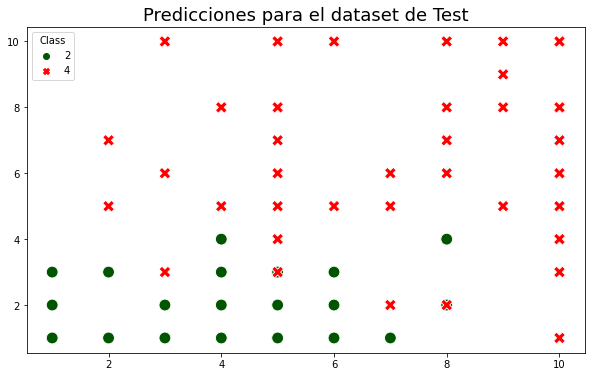

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette=['#050', '#f00'], style=y_test, s=140)
plt.title('Predicciones para el dataset de Test', fontdict={'size':18})
plt.show();